<a href="https://colab.research.google.com/github/4k1h3r/Basic-ARIMA-model/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('paper_production.csv')
df['Period']=pd.to_datetime(df['Period'], format='%b-%y')
print(df)

       Period  Paper_Prod   t
0  2017-01-01      2740.0   1
1  2017-02-01      2805.0   2
2  2017-03-01      2835.0   3
3  2017-04-01      2840.0   4
4  2017-05-01      2895.0   5
5  2017-06-01      2905.0   6
6  2017-07-01      2990.0   7
7  2017-08-01      3070.0   8
8  2017-09-01      3185.0   9
9  2017-10-01      3275.0  10
10 2017-11-01      3320.0  11
11 2017-12-01      3305.0  12
12 2018-01-01      3285.0  13
13 2018-02-01      3255.0  14
14 2018-03-01      3235.0  15
15 2018-04-01      3225.0  16
16 2018-05-01      3260.0  17
17 2018-06-01      3345.0  18
18 2018-07-01      3405.0  19
19 2018-08-01      3595.0  20
20 2018-09-01      3725.0  21
21 2018-10-01      3790.0  22
22 2018-11-01      3850.0  23
23 2018-12-01      3875.0  24
24 2019-01-01      3870.0  25
25 2019-02-01      3850.0  26
26 2019-03-01      3810.0  27
27 2019-04-01      3800.0  28
28 2019-05-01      3790.0  29
29 2019-06-01      3820.0  30
30 2019-07-01      3910.0  31
31 2019-08-01      3980.0  32
32 2019-09

In [3]:
df.set_index('Period',inplace=True)
df.head()

,Paper_Prod,t
Period,,
2017-01-01,2740.0,1
2017-02-01,2805.0,2
2017-03-01,2835.0,3
2017-04-01,2840.0,4
2017-05-01,2895.0,5


In [4]:
df.describe()

,Paper_Prod,t
count,48.000000,49.00000
mean,3731.145833,25.00000
std,577.354789,14.28869
min,2740.000000,1.00000
25%,3258.750000,13.00000
50%,3805.000000,25.00000
75%,4257.500000,37.00000
max,4635.000000,49.00000


<Axes: xlabel='Period'>

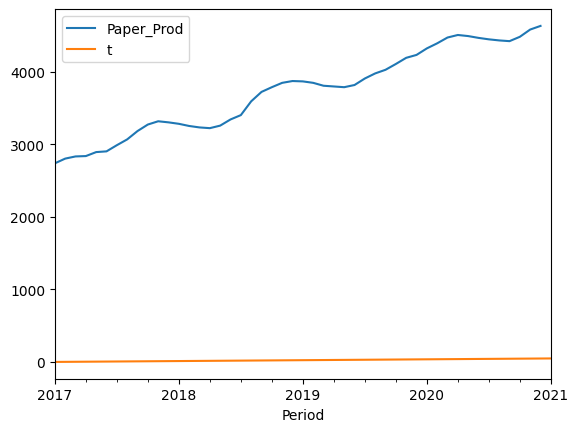

In [5]:
df.plot()

Testing staionarity

In [6]:
#H0: It SI NON STATIONARY
#H1: IT IS STATIONARY
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(df['Paper_Prod'])
def adfuller_test(prd):
  result=adfuller(prd)
  labels=['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
  for value,label in zip(result,labels):
    print(label+':'+str(value))
  if result[1]<=0.05:
    print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis")
  else:
    print("Weak evidence against null hypothesis, time series has a unit root indicating it as non stationary")
adfuller_test(df['Paper_Prod'].dropna())

ADF Test Statistic:-1.0181565686527365
p-value:0.7465846433492006
#Lags Used:5
Number of Observations Used:42
Weak evidence against null hypothesis, time series has a unit root indicating it as non stationary


Differencing

In [7]:
df['Prod First Diff']=df['Paper_Prod']-df['Paper_Prod'].shift(15)
df.head(17)

,Paper_Prod,t,Prod First Diff
Period,,,
2017-01-01,2740.0,1,NaN
2017-02-01,2805.0,2,NaN
2017-03-01,2835.0,3,NaN
2017-04-01,2840.0,4,NaN
2017-05-01,2895.0,5,NaN
2017-06-01,2905.0,6,NaN
2017-07-01,2990.0,7,NaN
2017-08-01,3070.0,8,NaN
2017-09-01,3185.0,9,NaN


In [8]:
adfuller_test(df['Prod First Diff'].dropna())

ADF Test Statistic:-7.021701325096312
p-value:6.51810208475759e-10
#Lags Used:3
Number of Observations Used:29
Strong evidence against the null hypothesis(Ho), reject the null hypothesis


<Axes: xlabel='Period'>

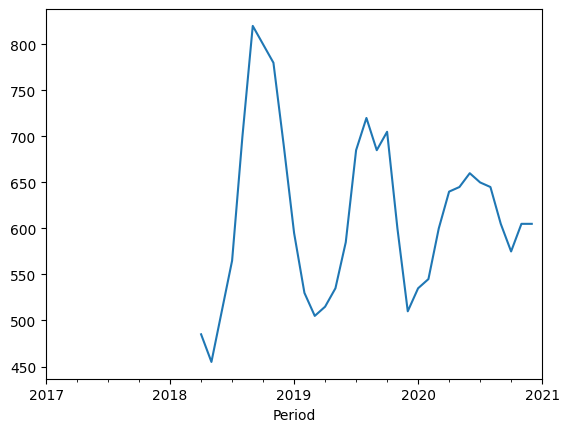

In [9]:
df['Prod First Diff'].plot()

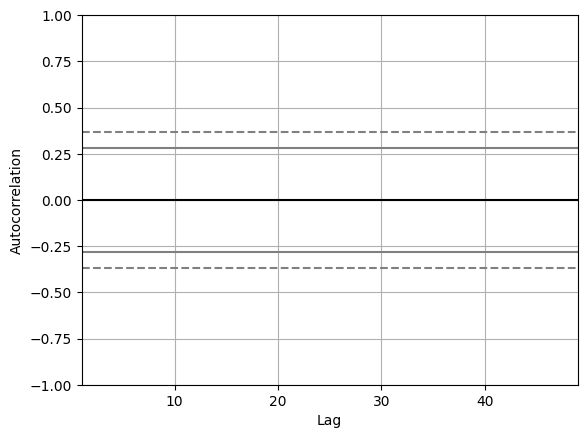

In [10]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Paper_Prod'])
plt.show()

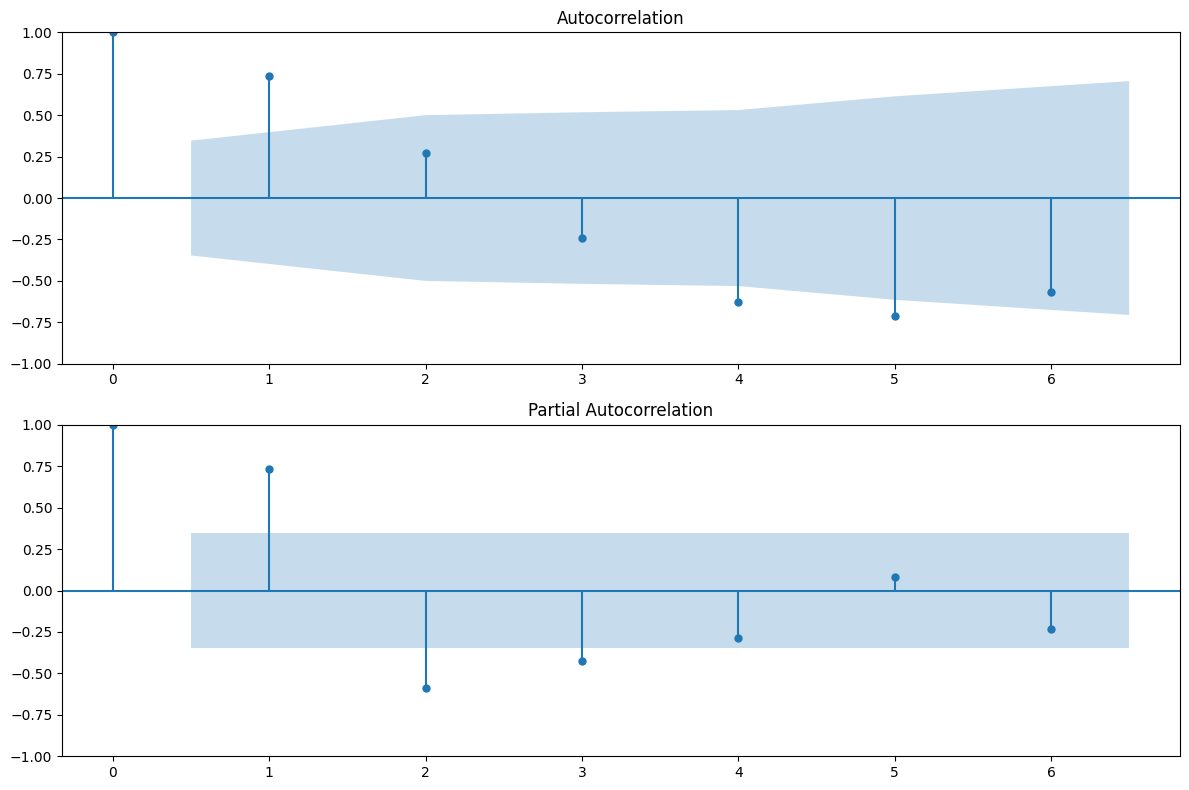

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from matplotlib import pyplot as plt
import numpy as np  # For safer len handling if needed

data = df['Prod First Diff'].iloc[16:].dropna()  # Ensure clean series
n = len(data)

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

max_lags = min(40, n // 5)  # Conservative: 1/5 of data length, cap at 40
plot_acf(data, lags=max_lags, ax=ax1)
plot_pacf(data, lags=max_lags, ax=ax2)

plt.tight_layout()
plt.show()

In [12]:
print( len(df['Prod First Diff'].iloc[16:])//2 - 1)

15


ARIMA implementatipon

In [13]:
#p=0 q=0 d=1
from statsmodels.tsa.arima.model import ARIMA # Import the updated ARIMA class
model=ARIMA(df['Paper_Prod'],order=(1,1,1)) # Create model using the updated class
model_fit=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Paper_Prod   No. Observations:                   49
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -239.406
Date:                Fri, 13 Feb 2026   AIC                            484.811
Time:                        02:37:52   BIC                            490.425
Sample:                    01-01-2017   HQIC                           486.932
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7791      0.156      5.004      0.000       0.474       1.084
ma.L1          0.0279      0.216      0.129      0.897      -0.395       0.451
sigma2      1531.5844    305.150      5.019      0.000     933.502    2129.667
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                15.11
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             1.13
Prob(H) (two-sided):                  0.82   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

,Paper_Prod,t,Prod First Diff,forcast
Period,,,,
2017-01-01,2740.0,1,NaN,NaN
2017-02-01,2805.0,2,NaN,NaN
2017-03-01,2835.0,3,NaN,NaN
2017-04-01,2840.0,4,NaN,NaN
2017-05-01,2895.0,5,NaN,NaN


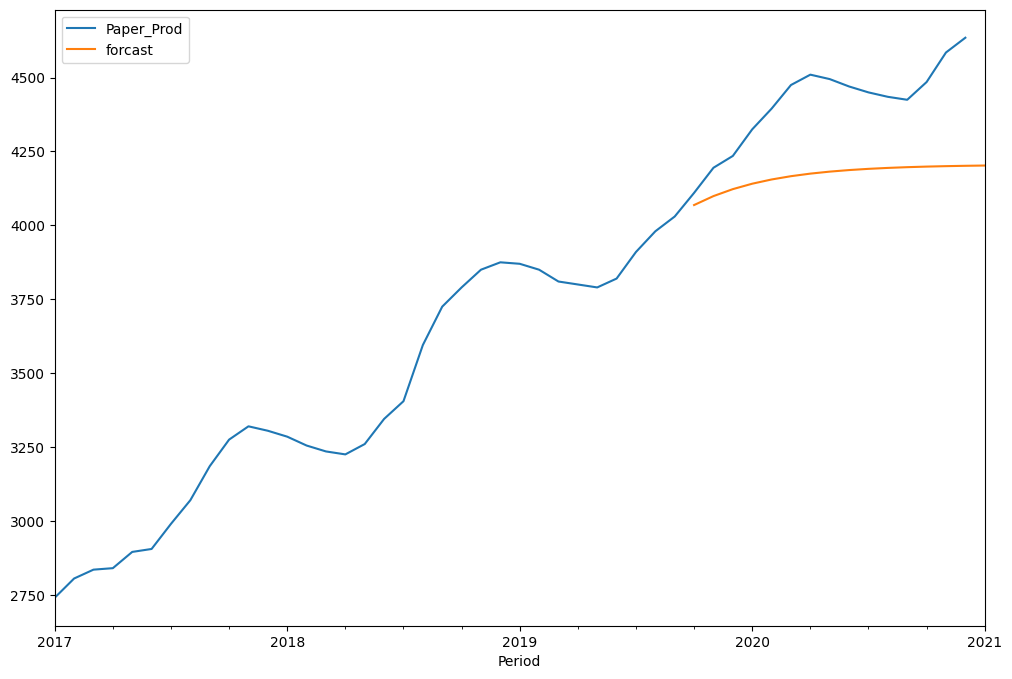

In [15]:
df['forcast']=model_fit.predict(start=33,end=48,dynamic=True)
df[["Paper_Prod",'forcast']].plot(figsize=(12,8))
df.head()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Period'>

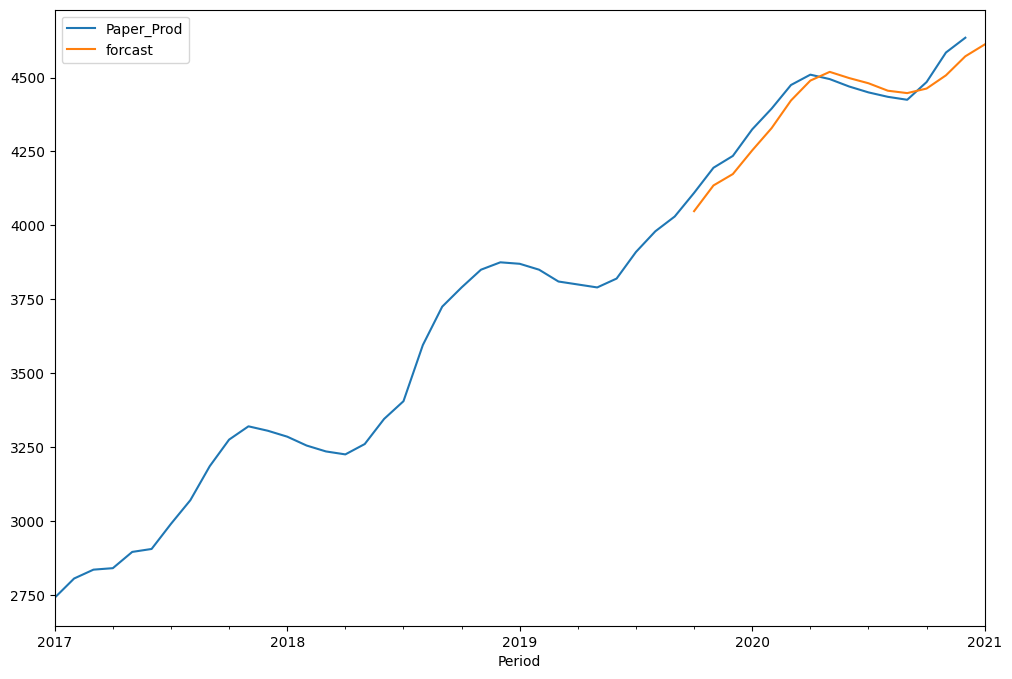

In [16]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(df['Paper_Prod'],order=(0,1,0),seasonal_order=(1,1,1,15))
results=model.fit()
df['forcast']=results.predict(start=33,end=48,dynamic=True)
df[['Paper_Prod','forcast']].plot(figsize=(12,8))